### Setup
Importing required packages

In [9]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Data 
Importing the data 

In [10]:
overdoses = pd.read_csv("Overdoses.csv")
overdose_deaths = pd.read_csv("Overdose deaths.csv")
monthly_overdoses = pd.read_csv("monthly.csv")

In [11]:
# examining the dataset
overdoses.head()

,Race,Sex,Age,D.O.D.,C.O.D.,Agency,Manner
0,W,F,30,01/02/2018,a) Fentanyl Intoxication,WCSP (Homer Glen),NaN
1,B,M,28,01/01/2018,"a) Cold Exposure, Part2: Phencyclidine Intoxic...",Joliet,NaN
2,B,M,46,01/05/2018,"a) Cocaine Intoxication, Part2: Coronary Ather...",Bolingbrook,NaN
3,W,M,34,01/06/2018,a) Fentanyl and Heroin Intoxication,New Lenox,NaN
4,W,M,35,01/08/2018,a) Fentanyl Intoxication,WCSP (Frankfort),NaN


In [12]:
# examining the null values
overdoses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 7 columns):
Race      539 non-null object
Sex       539 non-null object
Age       539 non-null int64
D.O.D.    539 non-null object
C.O.D.    539 non-null object
Agency    523 non-null object
Manner    418 non-null object
dtypes: int64(1), object(6)
memory usage: 29.6+ KB


In [13]:
# examining the dataset
overdose_deaths.head()

,Race,Sex,Age,D.O.D.,C.O.D.,Agency,Manner
0,W,M,35,01/08/2018,a) Fentanyl Intoxication,WCSP (Frankfort),NaN
1,W,M,34,01/06/2018,a) Fentanyl and Heroin Intoxication,New Lenox,NaN
2,W,F,30,01/02/2018,a) Fentanyl Intoxication,WCSP (Homer Glen),NaN
3,W,F,37,01/14/2018,"a) Fentanyl, Cocaine, Heroin, and Alcohol Into...",Manhattan,NaN
4,W,M,32,01/24/2018,Fentanyl and Cocaine Intoxication,New Lenox,NaN


In [14]:
# examining the null values
overdose_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 7 columns):
Race      379 non-null object
Sex       379 non-null object
Age       379 non-null int64
D.O.D.    379 non-null object
C.O.D.    379 non-null object
Agency    374 non-null object
Manner    297 non-null object
dtypes: int64(1), object(6)
memory usage: 20.8+ KB


In [15]:
#converting date(D.O.D.) to datetime

overdoses['Date'] = pd.to_datetime(overdoses['D.O.D.'])
overdose_deaths['Date'] = pd.to_datetime(overdose_deaths['D.O.D.'])



In [16]:
#extracting important features 
columns_for_analysis = ['Race', 'Sex', 'Age', 'Date']

overdoses = overdoses[columns_for_analysis]
overdose_deaths = overdose_deaths[columns_for_analysis]

In [17]:
#creating a new-column that represents whether the overdose was fatal or not
overdose_deaths['Fatal'] = 'Y'

In [18]:
overdose_deaths.head()

,Race,Sex,Age,Date,Fatal
0,W,M,35,2018-01-08,Y
1,W,M,34,2018-01-06,Y
2,W,F,30,2018-01-02,Y
3,W,F,37,2018-01-14,Y
4,W,M,32,2018-01-24,Y


In [19]:
overdoses['Race'].value_counts()

W           446
B            78
M             6
A             1
Hispanic      1
Asian         1
w             1
B/W           1
Korean        1
Mexican       1
K             1
H             1
Name: Race, dtype: int64

We observe various discrepancies in the ‘Race’ column. For example, in the below snippet, we can see that the White race is denoted by ‘W’ and ‘w’. We also see that while some are denoted using entire words like Mexican, and Asian, some are just denoted using letters, which makes it difficult to correctly identify which racial class a particular person belongs to. Also, some categories like Mexican fall under the category of Hispanic. The categories are not well defined.  To clean this, I considered all categories except B and W as Other and moved forward with the analysis since there were less than 5 cases that fall under this category each year. It would have been easier to clean this data had there been any data dictionary that tells us what exactly each of these categories means. 

In [20]:
overdose_deaths['Race'].value_counts()

W          325
B           47
M            2
w            2
Asian        1
Mexican      1
H            1
Name: Race, dtype: int64

In [21]:
overdoses['Sex'].value_counts()

M         392
F         142
W           2
f           1
Female      1
B           1
Name: Sex, dtype: int64

There was a similar problem observed in the ‘Sex’ column too.  ‘F’, ‘f’, ‘W’, and ‘Female’ represented the same category. But again, this was an assumption made on my part as there was no data dictionary to verify this. I however combined these under a single category. 


In [22]:
overdose_deaths['Sex'].value_counts()

M    288
F     90
W      1
Name: Sex, dtype: int64

In [23]:
#cleaning the Race and Sex column to distinguishable categories

overdoses.loc[overdoses['Race'] == 'w', 'Race'] = 'W'
overdoses.loc[overdoses['Race'] == 'M', 'Race'] = 'Other'
overdoses.loc[overdoses['Race'] == 'K', 'Race'] = 'Other'
overdoses.loc[overdoses['Race'] == 'Korean', 'Race'] = 'Other'
overdoses.loc[overdoses['Race'] == 'A', 'Race'] = 'Other'
overdoses.loc[overdoses['Race'] == 'H', 'Race'] = 'Other'
overdoses.loc[overdoses['Race'] == 'B/W', 'Race'] = 'Other'
overdoses.loc[overdoses['Race'] == 'Mexican', 'Race'] = 'Other'
overdoses.loc[overdoses['Race'] == 'Asian', 'Race'] = 'Other'
overdoses.loc[overdoses['Race'] == 'Hispanic', 'Race'] = 'Other'

overdose_deaths.loc[overdose_deaths['Race'] == 'w', 'Race'] = 'W'
overdose_deaths.loc[overdose_deaths['Race'] == 'M', 'Race'] = 'Other'
overdose_deaths.loc[overdose_deaths['Race'] == 'H', 'Race'] = 'Other'
overdose_deaths.loc[overdose_deaths['Race'] == 'Mexican', 'Race'] = 'Other'
overdose_deaths.loc[overdose_deaths['Race'] == 'Asian', 'Race'] = 'Other'

overdoses.loc[overdoses['Sex'] == 'Female', 'Sex'] = 'F'
overdoses.loc[overdoses['Sex'] == 'W', 'Sex'] = 'F'
overdoses.loc[overdoses['Sex'] == 'f', 'Sex'] = 'F'
overdoses.loc[overdoses['Sex'] == 'B', 'Sex'] = 'Other'

overdose_deaths.loc[overdose_deaths['Sex'] == 'W', 'Sex'] = 'F'


In [24]:
overdoses['Race'].value_counts()

W        447
B         78
Other     14
Name: Race, dtype: int64

In [25]:
overdose_deaths['Race'].value_counts()

W        327
B         47
Other      5
Name: Race, dtype: int64

In [26]:
overdoses['Sex'].value_counts()


M        392
F        146
Other      1
Name: Sex, dtype: int64

In [27]:
overdose_deaths['Sex'].value_counts()

M    288
F     91
Name: Sex, dtype: int64

In [28]:
#merging fatal and non-fatal overdoses in one dataframe
merged_df = pd.merge(overdoses,overdose_deaths,how='outer',on=['Race', 'Sex', 'Age', 'Date'])

In [29]:
merged_df.head()

,Race,Sex,Age,Date,Fatal
0,W,F,30,2018-01-02,Y
1,B,M,28,2018-01-01,NaN
2,B,M,46,2018-01-05,NaN
3,W,M,34,2018-01-06,Y
4,W,M,35,2018-01-08,Y


In [30]:
#filling the missing value in the fatal column created earlier 
merged_df["Fatal"].fillna("N", inplace = True)

In [31]:
merged_df.head()

,Race,Sex,Age,Date,Fatal
0,W,F,30,2018-01-02,Y
1,B,M,28,2018-01-01,N
2,B,M,46,2018-01-05,N
3,W,M,34,2018-01-06,Y
4,W,M,35,2018-01-08,Y


In [32]:
merged_df['year'] = merged_df['Date'].dt.year
merged_df['month'] = merged_df['Date'].dt.month
merged_df['dayofmonth'] = merged_df['Date'].dt.day


In [33]:
merged_df.head()

,Race,Sex,Age,Date,Fatal,year,month,dayofmonth
0,W,F,30,2018-01-02,Y,2018,1,2
1,B,M,28,2018-01-01,N,2018,1,1
2,B,M,46,2018-01-05,N,2018,1,5
3,W,M,34,2018-01-06,Y,2018,1,6
4,W,M,35,2018-01-08,Y,2018,1,8


### Analysis

#### Reasearch question: How were fatal and non-fatal overdoses influenced by the pandemic?

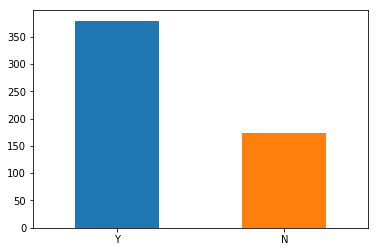

In [34]:
merged_df['Fatal'].value_counts().plot.bar(rot=0)

In [35]:
merged_df['count'] = 1

In [36]:
fatality_year = merged_df[['Fatal','year','count']].groupby(['Fatal','year']).count().reset_index()

Text(0,0.5,'number of overdoses')

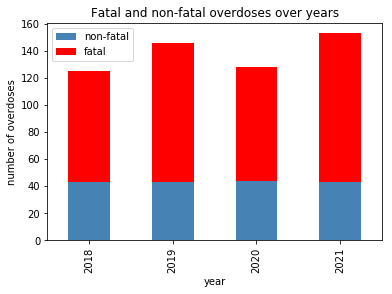

In [37]:
merged = pd.merge(fatality_year.loc[fatality_year['Fatal'] == 'N'],fatality_year.loc[fatality_year['Fatal'] == 'Y'],how='outer',on=['year'])
merged.rename(columns = {'count_x':'non-fatal', 'count_y':'fatal'}, inplace = True)
ax = merged.set_index('year').plot(kind='bar', stacked=True, color=['steelblue', 'red'], title='Fatal and non-fatal overdoses over years')
ax.set_ylabel("number of overdoses")


The above graph denotes the fatal and non-fatal overdoses over the years 2018 to 2021.  This graph clearly demonstrates that while there were no changes in the number of non-fatal overdoses, there was a change in the number of fatal overdoses over the years. This clearly states that even when there was a change in the total number of cases, the number of people that received medical attention and were saved as a result did not change.  However, we cannot come to the conclusion that fewer people were saved as a result of treatment changes that were delayed or denied treatment. This is because there are a lot of underlying reasons that led up to this result which need to be qualitatively examined to come to a solid conclusion. 

Text(0,0.5,'number of overdoses')

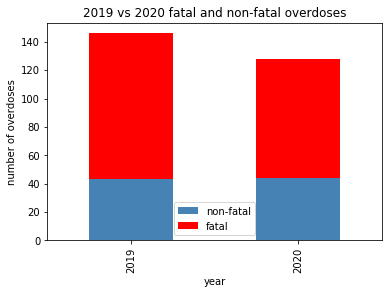

In [38]:

ax = merged.loc[(merged['year'] == 2019) | (merged['year'] == 2020)].set_index('year').plot(kind='bar', stacked=True, color=['steelblue', 'red'], title='2019 vs 2020 fatal and non-fatal overdoses')
ax.set_ylabel("number of overdoses")

The above graph shows unusual results. The literature review suggested that the COVID-19 pandemic severely affected the drug epidemic in the country. While this was true for the national studies (United States) and state-level studies (Illinois), this is not the case for Will County. We saw a considerable decrease if not significant in the number of fatal overdoses in 2020 (with the onset of the pandemic) as compared to 2019.

In [5]:
monthly_overdoses.head()

,year,Month,#Overdoses
0,2019,1,10
1,2019,2,17
2,2019,3,11
3,2019,4,11
4,2019,5,10


Hypothesis test:
Null hypothesis: The average monthly overdoses for 2019 is equal to the average monthly overdoses for 2020




In [41]:
from statsmodels.stats.weightstats import ztest as ztest

#Monthly overdoses for 2019 and 2020
A = monthly_overdoses.loc[monthly_overdoses['year'] == 2019]['#Overdoses']
B = monthly_overdoses.loc[monthly_overdoses['year'] == 2020]['#Overdoses']
#perform two sample z-test
ztest(A, B, value=0) 

(1.233039742912585, 0.2175609368555973)

To test this hypothesis, I performed a two-sampled z-test. The z-stat was |z| = 1.233
, it is then concluded that the null hypothesis is not rejected. Therefore, there is not enough evidence to claim that the average monthly overdoses for 2019 are different than the monthly overdoses for 2020 at a 0.05 significance level. 


#### Research question: How were different demographic affected by the pandemic?

In [254]:
race_wise_fatality = merged_df[['Fatal','count','Race','year']].groupby(['Fatal','Race','year']).count().reset_index()
#race_wise_fatality

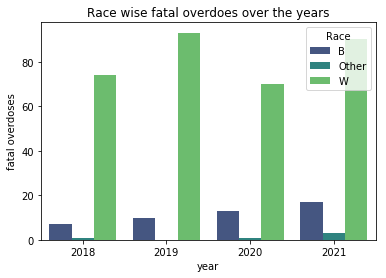

In [291]:

ax = sns.barplot(
    x="year", 
    y="count", 
    hue="Race",
    data=race_wise_fatality.loc[race_wise_fatality['Fatal'] == 'Y'], 
    palette='viridis',
    ci=None
    ).set(title='Race wise fatal overdoes over the years', ylabel='fatal overdoses')


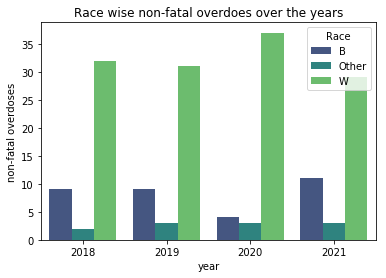

In [256]:

ax = sns.barplot(
    x="year", 
    y="count", 
    hue="Race",
    data=race_wise_fatality.loc[race_wise_fatality['Fatal'] == 'N'], 
    palette='viridis',
    ci=None
    ).set(title='Race wise non-fatal overdoes over the years', ylabel='non-fatal overdoses')



White people seemed to be the most affected by the drug overdose epidemic. However, I see an interesting result even though there was an increase in the number of non-fatal overdoses amongst White folks, there was a decrease in the number of fatal overdoses in 2020 as compared to 2019. Also, it is interesting here to note that this was exactly the opposite for people of color. While there was an overall decrease in non-fatal overdose cases, there was an increase in fatal overdoses in 2020 as compared to 2019 for African Americans. This is a little unusual. And I decided to investigate more. 


In [277]:
race_fatality = pd.merge(race_wise_fatality.loc[race_wise_fatality['Fatal'] == 'N'],race_wise_fatality.loc[race_wise_fatality['Fatal'] == 'Y'],how='outer',on=['Race', 'year'])
#race_fatality

In [278]:
race_fatality["Fatal_y"].fillna("Y", inplace = True)
race_fatality["count_y"].fillna(0, inplace = True)


In [279]:
#race_fatality

Text(0.5,0.98,'Fatal and Non-fatal overdoses of African Americans 2019 vs 2020')

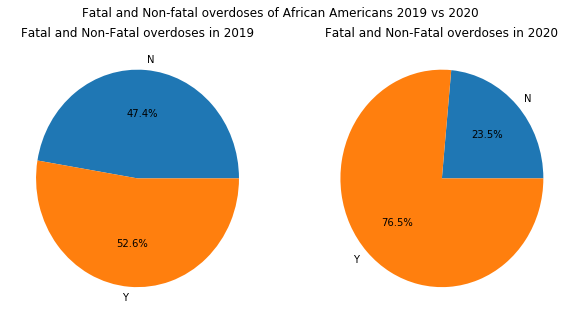

In [268]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5)) #ax1,ax2 refer to your two pies
# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1

labels =race_wise_fatality.loc[(race_wise_fatality['Race'] =='B') & (race_wise_fatality['year'] == 2019)]['Fatal']
values =race_wise_fatality.loc[(race_wise_fatality['Race'] =='B') & (race_wise_fatality['year'] == 2019)]['count']
ax1.pie(values,labels = labels,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Fatal and Non-Fatal overdoses in 2019')


labels =race_wise_fatality.loc[(race_wise_fatality['Race'] =='B') & (race_wise_fatality['year'] == 2020)]['Fatal']
values =race_wise_fatality.loc[(race_wise_fatality['Race'] =='B') & (race_wise_fatality['year'] == 2020)]['count']
ax2.pie(values,labels = labels,autopct = '%1.1f%%') #plot second pie
ax2.set_title('Fatal and Non-Fatal overdoses in 2020')

fig.suptitle('Fatal and Non-fatal overdoses of African Americans 2019 vs 2020')

Text(0.5,0.98,'Fatal and Non-fatal overdoses of White people 2019 vs 2020')

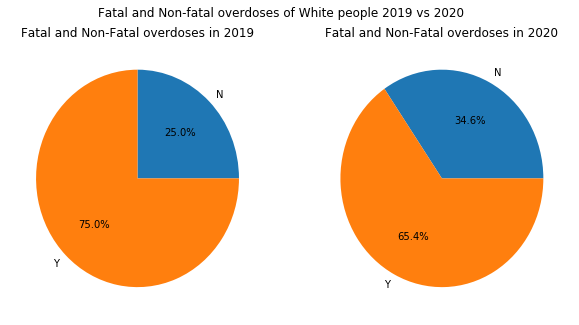

In [269]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5)) #ax1,ax2 refer to your two pies
# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1

labels =race_wise_fatality.loc[(race_wise_fatality['Race'] =='W') & (race_wise_fatality['year'] == 2019)]['Fatal']
values =race_wise_fatality.loc[(race_wise_fatality['Race'] =='W') & (race_wise_fatality['year'] == 2019)]['count']
ax1.pie(values,labels = labels,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Fatal and Non-Fatal overdoses in 2019')


labels =race_wise_fatality.loc[(race_wise_fatality['Race'] =='W') & (race_wise_fatality['year'] == 2020)]['Fatal']
values =race_wise_fatality.loc[(race_wise_fatality['Race'] =='W') & (race_wise_fatality['year'] == 2020)]['count']
ax2.pie(values,labels = labels,autopct = '%1.1f%%') #plot second pie
ax2.set_title('Fatal and Non-Fatal overdoses in 2020')

fig.suptitle('Fatal and Non-fatal overdoses of White people 2019 vs 2020')

Text(0.5,0.98,'Fatal and Non-fatal overdoses of other races 2019 vs 2020')

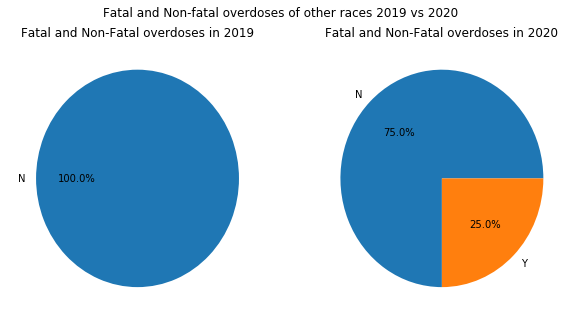

In [270]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5)) #ax1,ax2 refer to your two pies
# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1

labels =race_wise_fatality.loc[(race_wise_fatality['Race'] =='Other') & (race_wise_fatality['year'] == 2019)]['Fatal']
values =race_wise_fatality.loc[(race_wise_fatality['Race'] =='Other') & (race_wise_fatality['year'] == 2019)]['count']
ax1.pie(values,labels = labels,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Fatal and Non-Fatal overdoses in 2019')


labels =race_wise_fatality.loc[(race_wise_fatality['Race'] =='Other') & (race_wise_fatality['year'] == 2020)]['Fatal']
values =race_wise_fatality.loc[(race_wise_fatality['Race'] =='Other') & (race_wise_fatality['year'] == 2020)]['count']
ax2.pie(values,labels = labels,autopct = '%1.1f%%') #plot second pie
ax2.set_title('Fatal and Non-Fatal overdoses in 2020')

fig.suptitle('Fatal and Non-fatal overdoses of other races 2019 vs 2020')

These pie charts denote that there was a clear increase in the percentage of fatal overdoses in African Americans and other races, even though there was a decrease in total cases. However, for White people, there was a decrease in fatal overdoses even when there was an increase in total cases. This makes us question if there is some sort of bias involved when it comes to the treatment of drug overdose based on the racial profile of the victim. While the data at hand might suggest something of the sort, we can’t definitively say this is the case until we have more qualitative data on hand. These differences might have occurred due to multiple other reasons which are not represented in the data. 5. 


In [271]:
sex_wise_fatality = merged_df[['Fatal','count','Sex','year']].groupby(['Fatal','Sex','year']).count().reset_index()
#sex_wise_fatality

Text(0.5,0.98,'Fatal and Non-fatal overdoses of females 2019 vs 2020')

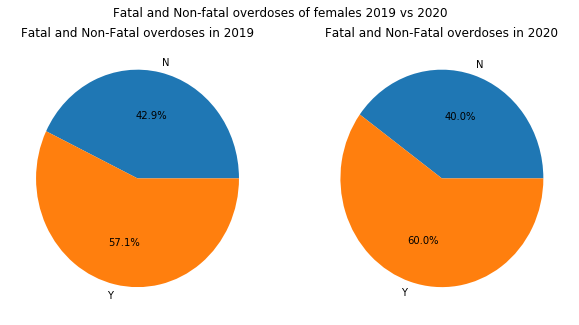

In [283]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10 ,5)) #ax1,ax2 refer to your two pies
# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1

labels =sex_wise_fatality.loc[(sex_wise_fatality['Sex'] =='F') & (sex_wise_fatality['year'] == 2019)]['Fatal']
values =sex_wise_fatality.loc[(sex_wise_fatality['Sex'] =='F') & (sex_wise_fatality['year'] == 2019)]['count']
ax1.pie(values,labels = labels,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Fatal and Non-Fatal overdoses in 2019')


labels =sex_wise_fatality.loc[(sex_wise_fatality['Sex'] =='F') & (sex_wise_fatality['year'] == 2020)]['Fatal']
values =sex_wise_fatality.loc[(sex_wise_fatality['Sex'] =='F') & (sex_wise_fatality['year'] == 2020)]['count']
ax2.pie(values,labels = labels,autopct = '%1.1f%%') #plot second pie
ax2.set_title('Fatal and Non-Fatal overdoses in 2020')

fig.suptitle('Fatal and Non-fatal overdoses of females 2019 vs 2020')

Text(0.5,0.98,'Fatal and Non-fatal overdoses of males 2019 vs 2020')

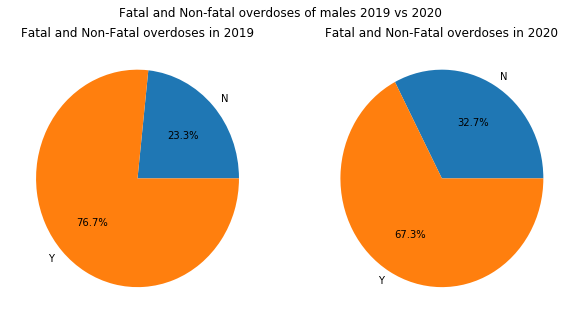

In [284]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5)) #ax1,ax2 refer to your two pies
# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1

labels =sex_wise_fatality.loc[(sex_wise_fatality['Sex'] =='M') & (sex_wise_fatality['year'] == 2019)]['Fatal']
values =sex_wise_fatality.loc[(sex_wise_fatality['Sex'] =='M') & (sex_wise_fatality['year'] == 2019)]['count']
ax1.pie(values,labels = labels,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Fatal and Non-Fatal overdoses in 2019')


labels =sex_wise_fatality.loc[(sex_wise_fatality['Sex'] =='M') & (sex_wise_fatality['year'] == 2020)]['Fatal']
values =sex_wise_fatality.loc[(sex_wise_fatality['Sex'] =='M') & (sex_wise_fatality['year'] == 2020)]['count']
ax2.pie(values,labels = labels,autopct = '%1.1f%%') #plot second pie
ax2.set_title('Fatal and Non-Fatal overdoses in 2020')

fig.suptitle('Fatal and Non-fatal overdoses of males 2019 vs 2020')

### Discussion
First of all, there was no observable difference between the non-fatal overdoses between 2019 and 2020. While there was no significant difference between fatal overdoses as well, we could still observe that there was a slight decrease in fatal overdoses in 2020 as compared to 2019. The situation was not similar to what was observed at the country level and state level which inspired these research questions to be explored. 

We also observed that different demographics were affected by the drug epidemic and the COVID-19 pandemic in different ways. Even though with this analysis, we necessarily don’t understand the reason behind such a difference, we still understand that it is an important issue. In the future, this question could be answered by a qualitative study of circumstances surrounding drug overdose deaths during the early stages of the COVID-19 pandemic. This could include considering other factors that were changed with the onset of the pandemic (like Mental health impacts, employment, clinical changes, living arrangements, SUDs, and much more) that in combination influenced this difference. Such data could be collected as a human-centered approach from death certificates and medical examiner/coroner (ME/C) reports, including death scene investigations and postmortem toxicology, to capture decedent demographics, overdose-specific circumstances, and drugs involved (i.e., listed as the cause of death). Additionally, abstractor-drafted case narratives provide context not captured through discrete fields. This activity could be then reviewed by professionals and data scientists consistent with applicable federal/state law and CDC policy. 

The simplistic nature of our analysis method helped us understand at a high level not only the story of how the pandemic affected drug overdose, but also ask follow-up questions such as why we saw some things and whether these observations were in line with what we hypothesized initially. Furthermore, Qualitative measures of how the socioeconomic conditions changed are not documented in this analysis – knowing a little more about them would be valuable. Though we mustn’t forget, a quantitative analysis of the data is what led us to identify this issue to be of pertinence in the first place. 
